In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
boston_df=pd.read_csv('../data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
Unnamed: 0    506 non-null int64
crim          506 non-null float64
zn            506 non-null float64
indus         506 non-null float64
chas          506 non-null int64
nox           506 non-null float64
rm            506 non-null float64
age           506 non-null float64
dis           506 non-null float64
rad           506 non-null int64
tax           506 non-null int64
ptratio       506 non-null float64
black         506 non-null float64
lstat         506 non-null float64
medv          506 non-null float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
boston_df.shape

(506, 14)

In [6]:
boston_df=boston_df.drop(['Unnamed: 0'],axis=1)

In [8]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
#Scater Plot code
def scatter_plot(df):
    g = sns.PairGrid(df)
    g.map_upper(plt.scatter, s=3)
    g.map_diag(plt.hist)
    g.map_lower(plt.scatter, s=3)
    g.fig.set_size_inches(12, 12)


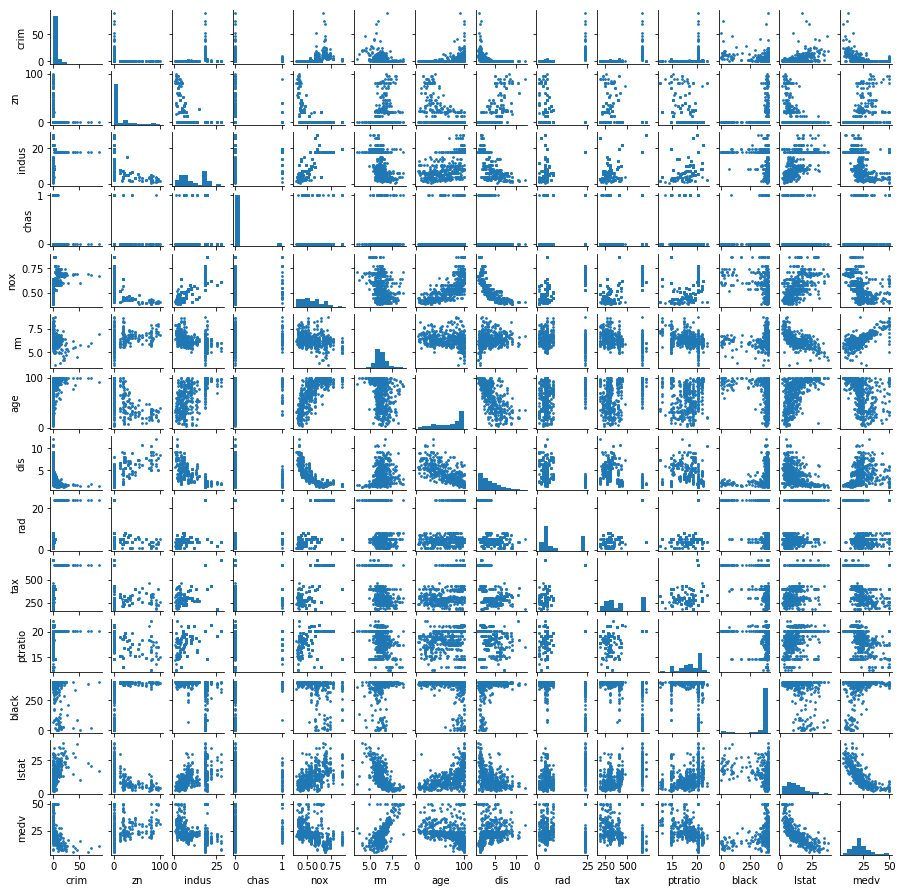

In [11]:
scatter_plot(boston_df)

In [21]:
def scatter_against_target(x,y):
    plt.scatter(boston_df[x],boston_df[y])
    plt.xlabel(x.upper())
    plt.ylabel('Target');

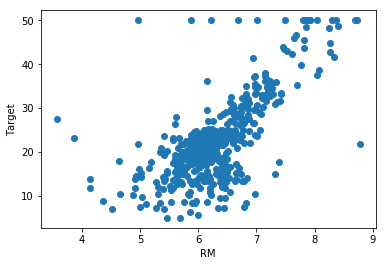

In [22]:
scatter_against_target('rm','medv')

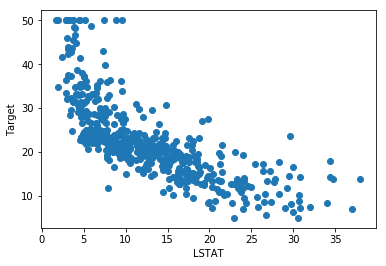

In [23]:
scatter_against_target('lstat','medv')

In [25]:
boston_df.corrwith(boston_df['crim']).sort_values()

medv      -0.388305
black     -0.385064
dis       -0.379670
rm        -0.219247
zn        -0.200469
chas      -0.055892
ptratio    0.289946
age        0.352734
indus      0.406583
nox        0.420972
lstat      0.455621
tax        0.582764
rad        0.625505
crim       1.000000
dtype: float64

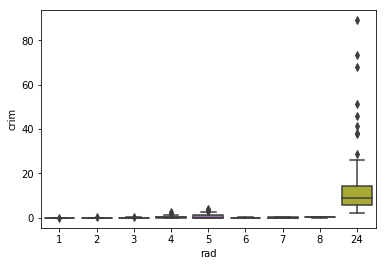

In [27]:
ax=sns.boxplot(x='rad',y='crim',data=boston_df)

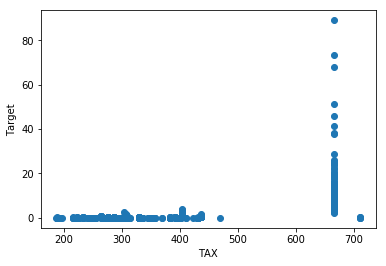

In [29]:
scatter_against_target('tax','crim')

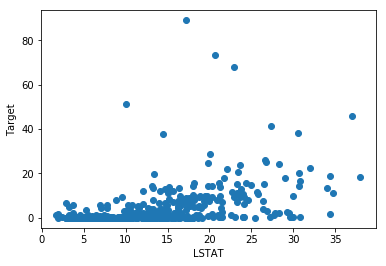

In [30]:
scatter_against_target('lstat','crim')

In [46]:
def nlargest(df,col,num):
    df=df.iloc[df[col].nlargest(num).index]
    print(df.head())
#boston_df.iloc[boston_df['crim'].nlargest(5).index]

In [47]:
nlargest(boston_df,'crim',5)

        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
380  88.9762  0.0   18.1     0  0.671  6.968   91.9  1.4165   24  666   
418  73.5341  0.0   18.1     0  0.679  5.957  100.0  1.8026   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   
410  51.1358  0.0   18.1     0  0.597  5.757  100.0  1.4130   24  666   
414  45.7461  0.0   18.1     0  0.693  4.519  100.0  1.6582   24  666   

     ptratio   black  lstat  medv  
380     20.2  396.90  17.21  10.4  
418     20.2   16.45  20.62   8.8  
405     20.2  384.97  22.98   5.0  
410     20.2    2.60  10.11  15.0  
414     20.2   88.27  36.98   7.0  


In [48]:
nlargest(boston_df,'tax',5)

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
488  0.15086  0.0  27.74     0  0.609  5.454  92.7  1.8209    4  711     20.1   
489  0.18337  0.0  27.74     0  0.609  5.414  98.3  1.7554    4  711     20.1   
490  0.20746  0.0  27.74     0  0.609  5.093  98.0  1.8226    4  711     20.1   
491  0.10574  0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711     20.1   
492  0.11132  0.0  27.74     0  0.609  5.983  83.5  2.1099    4  711     20.1   

      black  lstat  medv  
488  395.09  18.06  15.2  
489  344.05  23.97   7.0  
490  318.43  29.68   8.1  
491  390.11  18.07  13.6  
492  396.90  13.35  20.1  


In [49]:
nlargest(boston_df,'ptratio',5)

        crim    zn  indus  chas    nox     rm   age      dis  rad  tax  \
354  0.04301  80.0   1.91     0  0.413  5.663  21.9  10.5857    4  334   
355  0.10659  80.0   1.91     0  0.413  5.936  19.5  10.5857    4  334   
127  0.25915   0.0  21.89     0  0.624  5.693  96.0   1.7883    4  437   
128  0.32543   0.0  21.89     0  0.624  6.431  98.8   1.8125    4  437   
129  0.88125   0.0  21.89     0  0.624  5.637  94.7   1.9799    4  437   

     ptratio   black  lstat  medv  
354     22.0  382.80   8.05  18.2  
355     22.0  376.04   5.57  20.6  
127     21.2  392.11  17.19  16.2  
128     21.2  396.90  15.39  18.0  
129     21.2  396.90  18.34  14.3  


In [66]:
#10(e)
boston_df[boston_df['chas']==1].count()[0]

35

In [63]:
#10(e)
boston_df['chas'].value_counts()[1]

35

In [70]:
#10(f)
boston_df['ptratio'].median()

19.050000000000001

In [71]:
#10(g)
boston_df['medv'].idxmin()

398

In [72]:
boston_df.iloc[boston_df['medv'].idxmin()]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [73]:
a=boston_df.describe()
a

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [77]:
a.loc['range']=a.loc['max']-a.loc['min']
a.loc[boston_df['medv'].idxmin()]=boston_df.iloc[boston_df['medv'].idxmin()]

In [78]:
a

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,398
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,NaN
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN
range,88.969880,100.000000,27.280000,1.000000,0.486000,5.219000,97.100000,10.996900,23.000000,524.000000,9.400000,396.580000,36.240000,45.000000,NaN
398,38.351800,0.000000,18.100000,0.000000,0.693000,5.453000,100.000000,1.489600,24.000000,666.000000,20.200000,396.900000,30.590000,5.000000,NaN


In [85]:
#10(h)
boston_df.loc[boston_df['rm']>7].shape[0]

64

In [86]:
len(boston_df[boston_df['rm']>7])

64

In [87]:
len(boston_df[boston_df['rm']>8])

13